In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string

In [30]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [16]:
train_df = pd.read_csv('train_data.txt', 
    sep=" ::: ", 
    names=['id', 'title', 'genre', 'description'], 
    engine='python',
    skipinitialspace = True)

In [17]:
train_df.head()

id                             title     genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...

In [18]:
train_df.head()

id                             title     genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...

In [19]:
train_df.isna().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [20]:
train_df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [21]:
genre = train_df['genre'].value_counts()
fig = px.bar(genre, x=genre.index, y=genre, title='Genre Distribution')
fig.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig.show()

In [23]:
genre = train_df['genre'].value_counts()
fig = px.histogram(genre, x=genre.index, y=genre, title='Genre Distribution')
fig.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig.show()

In [26]:
def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [27]:
top_30_unigrams = get_top_n_bigram(train_df.description, ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(train_df.description, ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(train_df.description, ngram=3, top=30)

In [31]:
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
fig = px.bar(df1, x='unigram', y='count', title='Top 30 Unigrams', color='unigram')
fig.update_layout(xaxis_title='Unigram', yaxis_title='Count')
fig.update_xaxes(tickangle=80)

fig.show()

In [32]:
df1 = pd.DataFrame(top_30_bigrams, columns = ['unigram' , 'count'])
fig = px.bar(df1, x='unigram', y='count', title='Top 30 Unigrams', color='unigram')
fig.update_layout(xaxis_title='Unigram', yaxis_title='Count')
fig.update_xaxes(tickangle=80)

fig.show()

In [33]:
df1 = pd.DataFrame(top_30_trigrams, columns = ['unigram' , 'count'])
fig = px.bar(df1, x='unigram', y='count', title='Top 30 Unigrams', color='unigram')
fig.update_layout(xaxis_title='Unigram', yaxis_title='Count')
fig.update_xaxes(tickangle=80)

fig.show()

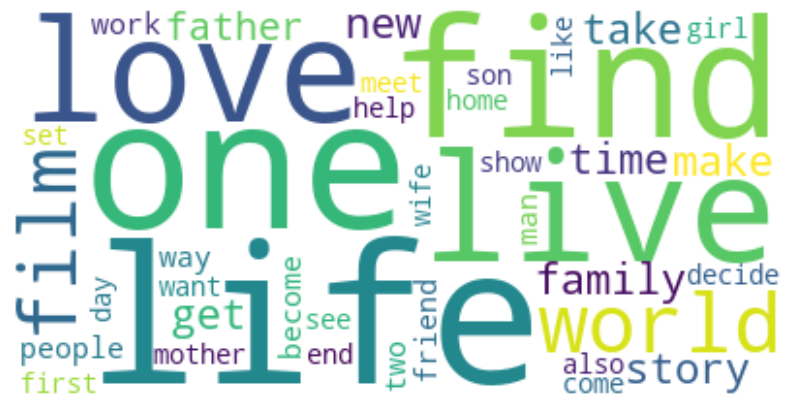

In [39]:
text_data = ' '.join(train_df['description'])
STOPWORDS = set(stopwords.words('english'))


# Create a WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=40, background_color='white').generate(text_data)

# Display the word cloud using Plotly Express
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [40]:
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Initialize stopwords and lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Remove numbers, lowercase words, remove stopwords, and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in STOPWORDS]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\malay\AppData\Roaming\nltk_data...


In [43]:
train_df['description_cleaned'] = train_df['description'].apply(clean_text)

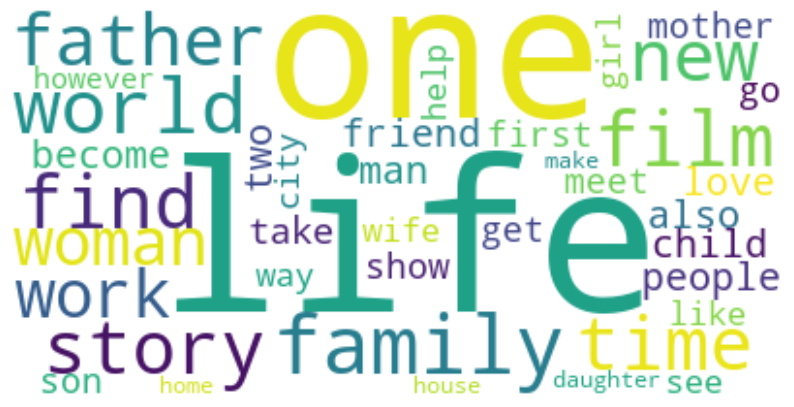

In [44]:
text_data = ' '.join(train_df['description_cleaned'])

wordcloud = WordCloud(stopwords=STOPWORDS, max_words=40, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\malay\AppData\Roaming\nltk_data...


True

In [45]:
train_df['length_cleaned']=train_df['description_cleaned'].apply(len)
fig = px.histogram(train_df, x='length_cleaned', nbins=100, title='Histogram of Length')
fig.update_layout(xaxis_title='Length', yaxis_title='Frequency')
fig.show()

In [46]:
grp_df = train_df.groupby('genre')['length_cleaned'].mean().reset_index()

fig = px.bar(grp_df, x='genre', y='length_cleaned', title='Mean Length by Genre')
fig.update_layout(xaxis_title='Genre', yaxis_title='Mean Description Length')

fig.show()

In [47]:
def make_genre_groups(df):
    df.genre.mask((df['genre'] == "biography") | (df['genre'] == "history"), "documentary", inplace=True)

    df.genre.mask((df['genre'] == "mystery") | (df['genre'] == "horror"), "thriller", inplace=True)

    df.genre.mask((df['genre'] == "adventure") | (df['genre'] == "sci-fi") | (df['genre'] == "fantasy"), 
                  "action", inplace=True)

    df.genre.mask((df['genre'] == "romance"), "comedy", inplace=True)

    df.genre.mask((df['genre'] == "short") | (df['genre'] == "western") | (df['genre'] == "reality-tv") |
                        (df['genre'] == "family") | (df['genre'] == "music") | (df['genre'] == "adult") |
                        (df['genre'] == "crime") | (df['genre'] == "animation") | (df['genre'] == "sport") |
                        (df['genre'] == "talk-show") | (df['genre'] == "musical") | (df['genre'] == "game-show") |
                        (df['genre'] == "news") | (df['genre'] == "war"), "other", inplace=True)
    return df

In [48]:
train_df = make_genre_groups(train_df.copy())


In [49]:
genre = train_df['genre'].value_counts()
fig = px.bar(genre, x=genre.index, y=genre, title='Genre Distribution', color=genre.index)
fig.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig.show()

In [50]:
train_df.head()

id                             title     genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     other   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         description  \
0  Listening in to a conversation between his doc...   
1  A brother and sister with a past incestuous re...   
2  As the bus empties the students for their fiel...   
3  To help their unemployed father make ends meet...   
4  The film's title refers not only to the un-rec...   

                                 description_cleaned  length_cleaned  
0  listening conversation doctor parent oscar lea...             346  
1  brother sister past incestuous relationship cu...             117  
2  bus empty student field trip museum natural hi...             369  
3  help unemployed father make end meet edith twi...             714  
4  film title refers body ground zero also state ...             377

In [51]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, ngram_range=(1, 3), max_features=5000)

In [52]:
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df.description_cleaned) 

In [53]:
tfidf_vectorizer.get_feature_names_out()[:10]

array(['aaron', 'abandon', 'abandoned', 'abducted', 'ability', 'able',
       'aboard', 'abortion', 'abroad', 'absence'], dtype=object)

In [54]:
train_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['genre'])

In [56]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'action': 0,
 'comedy': 1,
 'documentary': 2,
 'drama': 3,
 'other': 4,
 'thriller': 5}

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_tfidf_df, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    
    print('Accuracy', accuracy)
    print('Classification Report', cf_report)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

XGB

In [64]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [65]:
evaluate(y_test,y_pred)

Accuracy 0.5972516831135295
Classification Report               precision    recall  f1-score   support

           0       0.58      0.27      0.37       619
           1       0.59      0.40      0.48      1594
           2       0.73      0.76      0.74      2765
           3       0.55      0.71      0.62      2697
           4       0.51      0.53      0.52      2372
           5       0.63      0.47      0.54       796

    accuracy                           0.60     10843
   macro avg       0.60      0.52      0.55     10843
weighted avg       0.60      0.60      0.59     10843

Precision 0.5983207845963124
Recall 0.5248881344407469
F1-Score 0.545064782058263


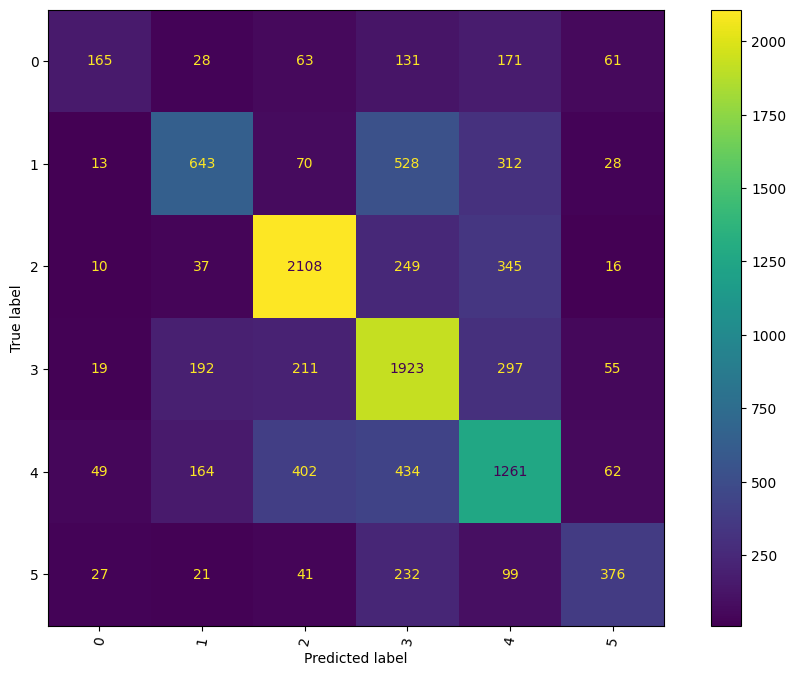

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=xgb_model.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)

plt.show();

In [68]:
from sklearn.utils import class_weight
import numpy as np
class_weights = list(class_weight.compute_class_weight(class_weight='balanced',
                                             classes = np.unique(y),
                                             y = y))

In [69]:
class_weights

[2.9528322440087145,
 1.1129038879993431,
 0.6641919043418603,
 0.6637527853277504,
 0.772015265436318,
 2.196321503808135]

In [71]:
weights = np.ones(X_train.shape[0], dtype = 'float')

In [72]:
for i, val in enumerate(y_train):
    weights[i] = class_weights[val]

weights

array([0.66375279, 0.66375279, 0.6641919 , ..., 0.66375279, 0.66375279,
       0.6641919 ])

Linear Regression

In [73]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train, sample_weight=weights)

LogisticRegression(random_state=42, solver='liblinear')

In [74]:
lr_pred = log_reg.predict(X_test)
evaluate(y_test, lr_pred)

Accuracy 0.6109010421470072
Classification Report               precision    recall  f1-score   support

           0       0.35      0.57      0.43       619
           1       0.54      0.60      0.57      1594
           2       0.76      0.76      0.76      2765
           3       0.66      0.57      0.61      2697
           4       0.60      0.46      0.52      2372
           5       0.51      0.71      0.59       796

    accuracy                           0.61     10843
   macro avg       0.57      0.61      0.58     10843
weighted avg       0.63      0.61      0.61     10843

Precision 0.5690612721235763
Recall 0.6129322534918987
F1-Score 0.5815151413828382


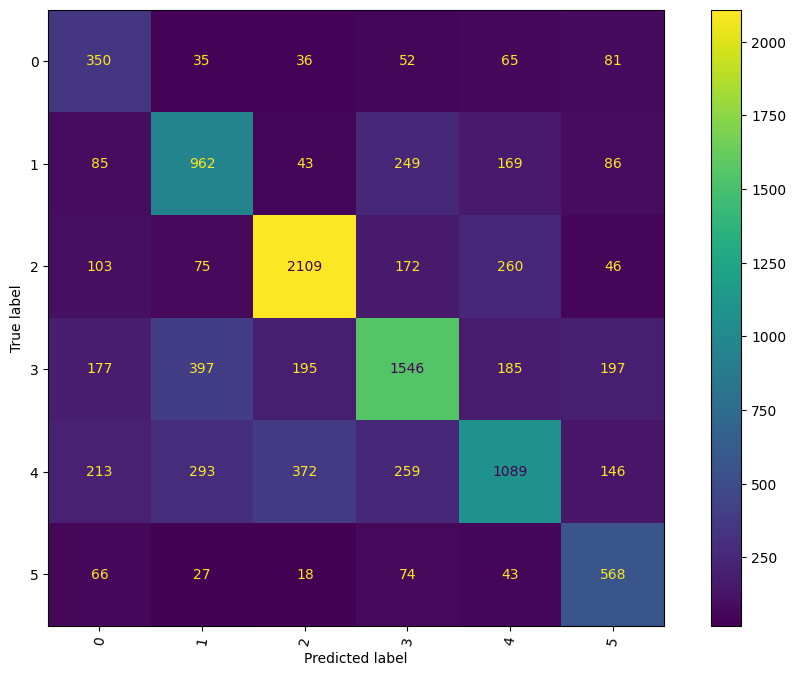

In [75]:
fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
cm = confusion_matrix(y_test, lr_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=xgb_model.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)

plt.show();